In [1]:
import pandas as pd
#import requests
#from bs4 import BeautifulSoup
#from tqdm.notebook import tqdm
import re
import random
from fuzzywuzzy import fuzz, process
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sn
import plotly
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler

In [2]:
spoty1=pd.read_csv('Spotify-2000.csv')

In [3]:
spoty1

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [4]:
spoty1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [5]:
spoty1.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Beats Per Minute (BPM)'}>],
       [<AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'Danceability'}>,
        <AxesSubplot:title={'center':'Loudness (dB)'}>],
       [<AxesSubplot:title={'center':'Liveness'}>,
        <AxesSubplot:title={'center':'Valence'}>,
        <AxesSubplot:title={'center':'Acousticness'}>],
       [<AxesSubplot:title={'center':'Speechiness'}>,
        <AxesSubplot:title={'center':'Popularity'}>, <AxesSubplot:>]],
      dtype=object)

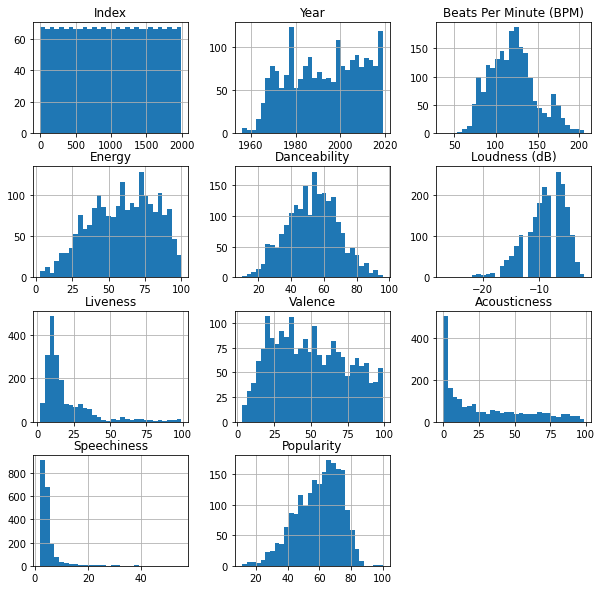

In [6]:
spoty1.hist(bins=30, figsize=(10,10))

In [7]:
num_spoty1=spoty1.iloc[:,4:]

In [8]:
#drop length

num_spoty1.drop(['Length (Duration)'], axis = 1, inplace = True)

In [9]:
num_spoty1

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
0,2004,157,30,53,-14,11,68,94,3,71
1,2000,135,79,50,-11,17,81,17,7,39
2,2001,168,69,66,-9,7,52,2,17,69
3,2007,173,96,43,-4,3,37,0,4,76
4,2002,106,82,58,-5,10,87,1,3,59
...,...,...,...,...,...,...,...,...,...,...
1989,1958,94,21,70,-12,11,72,84,7,63
1990,1958,175,76,36,-8,76,95,73,6,69
1991,1959,168,80,53,-9,31,97,74,7,74
1992,1959,174,26,45,-13,7,60,54,4,65


In [10]:
##scale

In [11]:
scaler=MinMaxScaler()

scaler.fit(num_spoty1)

MinMaxScaler()

In [12]:
sclaed_spoty=scaler.transform(num_spoty1)

## use the kmeans

In [13]:

kmeans=KMeans(n_clusters=44, random_state=42)

In [14]:
#hacemos que calcule los clusters
cluster=kmeans.fit(sclaed_spoty)

In [15]:
cluster.labels_

array([ 3,  2, 37, ..., 22, 16, 22])

In [16]:
num_spoty1['cluster']= cluster.labels_

In [17]:
num_spoty1['cluster'].value_counts()

5     87
11    77
9     74
39    70
37    65
21    57
26    57
23    55
1     54
41    54
8     53
0     52
20    51
16    50
2     48
33    48
17    48
15    46
31    46
24    44
42    44
6     44
4     44
25    43
34    40
28    40
35    40
29    39
32    39
19    38
40    38
30    37
7     37
36    37
12    36
43    36
22    36
10    34
38    34
13    33
18    27
14    25
27    24
3     13
Name: cluster, dtype: int64

In [18]:
num_spoty1

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,cluster
0,2004,157,30,53,-14,11,68,94,3,71,3
1,2000,135,79,50,-11,17,81,17,7,39,2
2,2001,168,69,66,-9,7,52,2,17,69,37
3,2007,173,96,43,-4,3,37,0,4,76,37
4,2002,106,82,58,-5,10,87,1,3,59,39
...,...,...,...,...,...,...,...,...,...,...,...
1989,1958,94,21,70,-12,11,72,84,7,63,33
1990,1958,175,76,36,-8,76,95,73,6,69,22
1991,1959,168,80,53,-9,31,97,74,7,74,22
1992,1959,174,26,45,-13,7,60,54,4,65,16
